In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [3]:
mimic = pd.read_csv('zevac_data.csv',sep='\t')

In [4]:
mimic=mimic[['patient_id', 'admission_id', 'age', 'sex', 'sc_date',
       'sample_type', 'bacteria_name', 'antibiotic_name', 'num_prev_adm',
       'interval', 'device', 'susceptibility', 'comorbidity']]

In [5]:
mimic.shape

(1934236, 13)

In [6]:
mimic=mimic.drop_duplicates().reset_index(drop=True)

In [7]:
mimic.shape

(1934236, 13)

In [8]:
comorbidityMapping={}
allComorbidity=mimic.comorbidity.unique()
for i in range(len(allComorbidity)):
    comorbidityMapping['comorbidity'+str(i)]=allComorbidity[i]
comorbidityMapping

{'comorbidity0': 'endocrine, nutritional and metabolic diseases, and immunity disorders',
 'comorbidity1': 'diseases of the blood and blood-forming organs',
 'comorbidity2': 'mental disorders',
 'comorbidity3': 'diseases of the nervous system and sense organs',
 'comorbidity4': 'diseases of the circulatory system',
 'comorbidity5': 'diseases of the genitourinary system',
 'comorbidity6': 'symptoms, signs, and ill-defined conditions',
 'comorbidity7': 'external causes of injury and supplemental classification',
 'comorbidity8': 'infectious and parasitic diseases',
 'comorbidity9': 'diseases of the musculoskeletal system and connective tissue',
 'comorbidity10': 'injury and poisoning',
 'comorbidity11': 'neoplasms',
 'comorbidity12': 'diseases of the respiratory system',
 'comorbidity13': 'diseases of the skin and subcutaneous tissue',
 'comorbidity14': 'diseases of the digestive system',
 'comorbidity15': 'congenital anomalies',
 'comorbidity16': 'certain conditions originating in the p

In [9]:
inverseMap = {value: key for key, value in comorbidityMapping.items()}
inverseMap

{'endocrine, nutritional and metabolic diseases, and immunity disorders': 'comorbidity0',
 'diseases of the blood and blood-forming organs': 'comorbidity1',
 'mental disorders': 'comorbidity2',
 'diseases of the nervous system and sense organs': 'comorbidity3',
 'diseases of the circulatory system': 'comorbidity4',
 'diseases of the genitourinary system': 'comorbidity5',
 'symptoms, signs, and ill-defined conditions': 'comorbidity6',
 'external causes of injury and supplemental classification': 'comorbidity7',
 'infectious and parasitic diseases': 'comorbidity8',
 'diseases of the musculoskeletal system and connective tissue': 'comorbidity9',
 'injury and poisoning': 'comorbidity10',
 'neoplasms': 'comorbidity11',
 'diseases of the respiratory system': 'comorbidity12',
 'diseases of the skin and subcutaneous tissue': 'comorbidity13',
 'diseases of the digestive system': 'comorbidity14',
 'congenital anomalies': 'comorbidity15',
 'certain conditions originating in the perinatal period':

In [10]:
mimic.comorbidity = mimic.comorbidity.replace(inverseMap)

In [11]:
def comorbidityOneHot(row):
    comorbidityList = list(mimic[((mimic['patient_id']==row.patient_id) & (mimic['admission_id']==row.admission_id))].comorbidity.unique())
    for i in range(len(allComorbidity)):
        columnName = inverseMap[allComorbidity[i]]
        if columnName in comorbidityList:
            row[columnName]=1
        else:
            row[columnName]=0
    return row

In [12]:
idTable = mimic[['patient_id', 'admission_id']].drop_duplicates().reset_index(drop=True)
idTableComorbidity = idTable.apply(comorbidityOneHot, axis=1)
idTableComorbidity

,patient_id,admission_id,comorbidity0,comorbidity1,comorbidity2,comorbidity3,comorbidity4,comorbidity5,comorbidity6,comorbidity7,...,comorbidity9,comorbidity10,comorbidity11,comorbidity12,comorbidity13,comorbidity14,comorbidity15,comorbidity16,comorbidity17,comorbidity18
0,106,145167,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,109,193281,0,1,0,1,1,1,1,1,...,1,1,0,0,0,0,0,0,0,0
2,109,175347,0,1,0,1,1,1,1,1,...,1,1,0,0,0,0,0,0,0,0
3,41,101757,0,1,1,1,1,0,1,1,...,0,0,1,1,1,0,0,0,0,0
4,43,146828,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
5,9,150750,1,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
6,21,111970,1,1,0,0,1,0,1,1,...,0,1,1,1,1,1,0,0,0,0
7,26,197661,1,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
8,31,128652,0,0,0,1,1,0,0,1,...,0,0,1,1,0,0,0,0,0,0
9,38,185910,0,0,0,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,0


In [13]:
mimicFormatted = pd.merge(mimic, idTableComorbidity, how='left', on=['patient_id', 'admission_id'])

In [14]:
mimicFormatted.shape

(1934236, 32)

In [28]:
#mimicFormatted = mimicFormatted.drop(columns=['comorbidity18'])

In [29]:
#mimicFormatted.shape

In [15]:
mimicFormatted.columns

Index(['patient_id', 'admission_id', 'age', 'sex', 'sc_date', 'sample_type',
       'bacteria_name', 'antibiotic_name', 'num_prev_adm', 'interval',
       'device', 'susceptibility', 'comorbidity', 'comorbidity0',
       'comorbidity1', 'comorbidity2', 'comorbidity3', 'comorbidity4',
       'comorbidity5', 'comorbidity6', 'comorbidity7', 'comorbidity8',
       'comorbidity9', 'comorbidity10', 'comorbidity11', 'comorbidity12',
       'comorbidity13', 'comorbidity14', 'comorbidity15', 'comorbidity16',
       'comorbidity17', 'comorbidity18'],
      dtype='object')

In [16]:
deviceMapping={}
allDevice=mimic.device.unique()
for i in range(len(allDevice)):
    deviceMapping[allDevice[i]] ='device'+str(i)
deviceMapping

{'No Device': 'device0',
 'INSERT HEPATIC HUNT TIPS': 'device1',
 'CVL Insertion': 'device2',
 'Chest Tube Insertion': 'device3',
 'ABSCESS CHG & REINSERT': 'device4',
 'Catheter Insertion': 'device5',
 'THORACOSTOMY TUBE INSERTION': 'device6',
 'INSERT ABD PORT': 'device7',
 'Bedside PEG insertion note': 'device8',
 'Arterial Line Insertion Procedure Note': 'device9'}

In [17]:
mimic.device = mimic.device.replace(deviceMapping)

In [18]:
def deviceOneHot(row):
    deviceList = list(mimic[((mimic['patient_id']==row.patient_id) & (mimic['admission_id']==row.admission_id))].device.unique())
    for i in range(len(allDevice)):
        columnName = deviceMapping[allDevice[i]]
        if columnName in deviceList:
            row[columnName]=1
        else:
            row[columnName]=0
    return row

idTable = mimic[['patient_id', 'admission_id']].drop_duplicates().reset_index(drop=True)
idTableDevice = idTable.apply(deviceOneHot, axis=1)
idTableDevice

,patient_id,admission_id,device0,device1,device2,device3,device4,device5,device6,device7,device8,device9
0,106,145167,1,0,0,0,0,0,0,0,0,0
1,109,193281,1,0,0,0,0,0,0,0,0,0
2,109,175347,1,0,0,0,0,0,0,0,0,0
3,41,101757,1,0,0,0,0,0,0,0,0,0
4,43,146828,1,0,0,0,0,0,0,0,0,0
5,9,150750,1,0,0,0,0,0,0,0,0,0
6,21,111970,1,0,0,0,0,0,0,0,0,0
7,26,197661,1,0,0,0,0,0,0,0,0,0
8,31,128652,1,0,0,0,0,0,0,0,0,0
9,38,185910,1,0,0,0,0,0,0,0,0,0


In [19]:
mimicFormattedDevice = pd.merge(mimicFormatted, idTableDevice, how='left', on=['patient_id', 'admission_id'])

In [20]:
mimicFormattedDevice.shape

(1934236, 42)

In [21]:
mimicFormattedDevice.columns

Index(['patient_id', 'admission_id', 'age', 'sex', 'sc_date', 'sample_type',
       'bacteria_name', 'antibiotic_name', 'num_prev_adm', 'interval',
       'device', 'susceptibility', 'comorbidity', 'comorbidity0',
       'comorbidity1', 'comorbidity2', 'comorbidity3', 'comorbidity4',
       'comorbidity5', 'comorbidity6', 'comorbidity7', 'comorbidity8',
       'comorbidity9', 'comorbidity10', 'comorbidity11', 'comorbidity12',
       'comorbidity13', 'comorbidity14', 'comorbidity15', 'comorbidity16',
       'comorbidity17', 'comorbidity18', 'device0', 'device1', 'device2',
       'device3', 'device4', 'device5', 'device6', 'device7', 'device8',
       'device9'],
      dtype='object')

In [22]:
mimicFormattedDevice.susceptibility = mimicFormattedDevice.susceptibility.replace({'I': 'R'})

In [23]:
mimicFormatted.susceptibility = mimicFormatted.susceptibility.replace({'I': 'R'})

In [24]:
mimic.susceptibility = mimic.susceptibility.replace({'I': 'R'})

##### Performance Metrics

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

##### Sample wise Performance for One Hot Encoded Data

In [26]:
temp = mimic.drop_duplicates(subset=['patient_id', 'admission_id', 'sample_type']).sample_type.value_counts()
samples = temp[temp>1000].index.tolist()
samples

['Urine', 'Sputum', 'Blood', 'Pus Swab']

##### Store 100 Random Splits

In [27]:
def sampleSplits(sample):
    sampleData = mimicFormattedDevice[mimicFormattedDevice.sample_type==sample]
    uniqueData = sampleData.drop_duplicates().reset_index(drop=True)
    features = ['age', 'sex', 'num_prev_adm', 'interval', 'comorbidity0',
       'comorbidity1', 'comorbidity2', 'comorbidity3', 'comorbidity4',
       'comorbidity5', 'comorbidity6', 'comorbidity7', 'comorbidity8',
       'comorbidity9', 'comorbidity10', 'comorbidity11', 'comorbidity12',
       'comorbidity13', 'comorbidity14', 'comorbidity15', 'comorbidity16',
       'comorbidity17', 'comorbidity18', 'device0', 'device1', 'device2',
       'device3', 'device4', 'device5', 'device6', 'device7', 'device8',
       'device9', 'antibiotic_name']
    filteredData = uniqueData[features + ['susceptibility']]
    labelEncoder = preprocessing.LabelEncoder()
    encodedData = filteredData.apply(labelEncoder.fit_transform)
    trainSplits=[]
    testSplits=[]
    for i in range(100):
        train, test = train_test_split(encodedData, test_size=0.3)
        trainSplits.append(train)
        testSplits.append(test)
    return trainSplits, testSplits

sampleData = []
for i in samples:
    sampleData.append(sampleSplits(i))

In [28]:
#first sample (urine), first training data
sampleData[0][0][0]

,age,sex,num_prev_adm,interval,comorbidity0,comorbidity1,comorbidity2,comorbidity3,comorbidity4,comorbidity5,...,device2,device3,device4,device5,device6,device7,device8,device9,antibiotic_name,susceptibility
83934,59,0,1,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,7,1
203363,51,1,0,19,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,26,0
248836,72,1,0,3,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,2,1
445580,68,0,0,0,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,1,1
230204,56,1,0,11,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,21,0
80418,52,1,2,21,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,10,0
65418,22,1,0,55,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,28,1
139782,26,0,0,2,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,6,1
113118,39,0,1,1,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,15,1
295137,46,0,1,5,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,10,1


In [29]:
#first sample (urine), last test data
sampleData[0][1][99]

,age,sex,num_prev_adm,interval,comorbidity0,comorbidity1,comorbidity2,comorbidity3,comorbidity4,comorbidity5,...,device2,device3,device4,device5,device6,device7,device8,device9,antibiotic_name,susceptibility
320913,72,0,0,6,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,24,1
329875,73,0,0,0,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,10,0
503264,37,1,0,6,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,27,1
200798,31,0,6,0,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,12,1
434040,65,0,0,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,19,1
120157,47,1,1,22,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,4,1
450440,36,0,0,8,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,20,1
157516,59,1,0,2,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,7,1
443892,24,0,0,6,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,25,1
9894,56,1,0,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,12,1


##### Model Performance

In [55]:
def mimicRandomSplitPerformance(data, model):
    features = ['age', 'sex', 'num_prev_adm', 'interval', 'comorbidity0',
       'comorbidity1', 'comorbidity2', 'comorbidity3', 'comorbidity4',
       'comorbidity5', 'comorbidity6', 'comorbidity7', 'comorbidity8',
       'comorbidity9', 'comorbidity10', 'comorbidity11', 'comorbidity12',
       'comorbidity13', 'comorbidity14', 'comorbidity15', 'comorbidity16',
       'comorbidity17', 'comorbidity18', 'device0', 'device1', 'device2',
       'device3', 'device4', 'device5', 'device6', 'device7', 'device8',
       'device9', 'antibiotic_name']
    performance_matrix = []
    for i in range(100):
        train = data[0][i]
        test = data[1][i]
        Xtrain = train[features]
        Xtest = test[features]
        ytrain = train['susceptibility']
        ytest = test['susceptibility']
    
        model.fit(Xtrain, ytrain)
        probabilities = model.predict_proba(Xtest)[:, 1]
        predictions = np.array([1 if x>0.5 else 0 for x in probabilities])
        tn, fp, fn, tp = confusion_matrix(ytest, predictions).ravel()
        specificity = tn / (tn+fp)
        recall = recall_score(ytest, predictions)
        Youden = specificity + recall - 1
        measures = [100*accuracy_score(ytest, predictions), f1_score(ytest, predictions), precision_score(ytest, predictions), 
                specificity, recall, Youden, cohen_kappa_score(ytest, predictions), roc_auc_score(ytest, probabilities)]
        performance_matrix.append(measures)
        print(i,'-th split done')
    
    avg = [str(x) for x in np.round(np.mean(performance_matrix, axis=0), decimals=2)]
    stdv = [str(x) for x in np.round(np.std(performance_matrix, axis=0), decimals=2)]
    final_results = [avg[i]+chr(177)+stdv[i] for i in range(len(avg))]
    
    return final_results
    

###### Model Creation

In [98]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [54]:
models = {'Decision Tree':DecisionTreeClassifier(), 'Adaptive Boosting': AdaBoostClassifier(), 
          'Gradient Boosting': GradientBoostingClassifier()}

In [58]:
measures = []
for i in range(len(samples)):
    for j, (name, model) in enumerate(models.items()):
        print(samples[i],':')
        print(name,':')
        print('__________________________________________________________________________________')
        performance = mimicRandomSplitPerformance(sampleData[i], model)
        measures.append([samples[i], name] + performance)
        
table = pd.DataFrame(measures, columns=['Sample', 'Model', 'Accuracy', 'F1_score', 'Precision', 'Specificity', 'Recall', 'YoudensJ', 'Kappa', 'AUC_ROC'])
table

Urine :
Decision Tree :
__________________________________________________________________________________
0 -th split done
1 -th split done
2 -th split done
3 -th split done
4 -th split done
5 -th split done
6 -th split done
7 -th split done
8 -th split done
9 -th split done
10 -th split done
11 -th split done
12 -th split done
13 -th split done
14 -th split done
15 -th split done
16 -th split done
17 -th split done
18 -th split done
19 -th split done
20 -th split done
21 -th split done
22 -th split done
23 -th split done
24 -th split done
25 -th split done
26 -th split done
27 -th split done
28 -th split done
29 -th split done
30 -th split done
31 -th split done
32 -th split done
33 -th split done
34 -th split done
35 -th split done
36 -th split done
37 -th split done
38 -th split done
39 -th split done
40 -th split done
41 -th split done
42 -th split done
43 -th split done
44 -th split done
45 -th split done
46 -th split done
47 -th split done
48 -th split done
49 -th split done
50 

28 -th split done
29 -th split done
30 -th split done
31 -th split done
32 -th split done
33 -th split done
34 -th split done
35 -th split done
36 -th split done
37 -th split done
38 -th split done
39 -th split done
40 -th split done
41 -th split done
42 -th split done
43 -th split done
44 -th split done
45 -th split done
46 -th split done
47 -th split done
48 -th split done
49 -th split done
50 -th split done
51 -th split done
52 -th split done
53 -th split done
54 -th split done
55 -th split done
56 -th split done
57 -th split done
58 -th split done
59 -th split done
60 -th split done
61 -th split done
62 -th split done
63 -th split done
64 -th split done
65 -th split done
66 -th split done
67 -th split done
68 -th split done
69 -th split done
70 -th split done
71 -th split done
72 -th split done
73 -th split done
74 -th split done
75 -th split done
76 -th split done
77 -th split done
78 -th split done
79 -th split done
80 -th split done
81 -th split done
82 -th split done
83 -th spl

61 -th split done
62 -th split done
63 -th split done
64 -th split done
65 -th split done
66 -th split done
67 -th split done
68 -th split done
69 -th split done
70 -th split done
71 -th split done
72 -th split done
73 -th split done
74 -th split done
75 -th split done
76 -th split done
77 -th split done
78 -th split done
79 -th split done
80 -th split done
81 -th split done
82 -th split done
83 -th split done
84 -th split done
85 -th split done
86 -th split done
87 -th split done
88 -th split done
89 -th split done
90 -th split done
91 -th split done
92 -th split done
93 -th split done
94 -th split done
95 -th split done
96 -th split done
97 -th split done
98 -th split done
99 -th split done
Pus Swab :
Decision Tree :
__________________________________________________________________________________
0 -th split done
1 -th split done
2 -th split done
3 -th split done
4 -th split done
5 -th split done
6 -th split done
7 -th split done
8 -th split done
9 -th split done
10 -th split done


,Sample,Model,Accuracy,F1_score,Precision,Specificity,Recall,YoudensJ,Kappa,AUC_ROC
0,Urine,Decision Tree,97.64±0.03,0.98±0.0,0.99±0.0,0.96±0.0,0.98±0.0,0.94±0.0,0.94±0.0,1.0±0.0
1,Urine,Adaptive Boosting,76.74±0.1,0.86±0.0,0.78±0.0,0.2±0.0,0.96±0.0,0.16±0.0,0.21±0.0,0.76±0.0
2,Urine,Gradient Boosting,78.03±0.11,0.87±0.0,0.79±0.0,0.24±0.0,0.96±0.0,0.2±0.0,0.26±0.0,0.79±0.0
3,Sputum,Decision Tree,96.12±0.04,0.97±0.0,0.97±0.0,0.95±0.0,0.97±0.0,0.92±0.0,0.91±0.0,1.0±0.0
4,Sputum,Adaptive Boosting,75.9±0.26,0.83±0.0,0.77±0.0,0.45±0.01,0.91±0.0,0.36±0.01,0.4±0.01,0.81±0.0
5,Sputum,Gradient Boosting,78.0±0.12,0.85±0.0,0.79±0.0,0.51±0.01,0.91±0.0,0.43±0.0,0.46±0.0,0.84±0.0
6,Blood,Decision Tree,96.57±0.04,0.97±0.0,0.98±0.0,0.96±0.0,0.97±0.0,0.93±0.0,0.92±0.0,1.0±0.0
7,Blood,Adaptive Boosting,76.48±0.19,0.83±0.0,0.78±0.0,0.53±0.01,0.89±0.0,0.42±0.01,0.45±0.0,0.81±0.0
8,Blood,Gradient Boosting,78.31±0.11,0.84±0.0,0.8±0.0,0.59±0.0,0.88±0.0,0.48±0.0,0.5±0.0,0.83±0.0
9,Pus Swab,Decision Tree,96.6±0.06,0.97±0.0,0.98±0.0,0.96±0.0,0.97±0.0,0.93±0.0,0.93±0.0,1.0±0.0


In [60]:
models_rf = {'Random Forest': RandomForestClassifier(n_estimators=50, max_depth=5, random_state=0)}
measures_rf = []
for i in range(len(samples)):
    for j, (name, model) in enumerate(models_rf.items()):
        print(samples[i],':')
        print(name,':')
        print('__________________________________________________________________________________')
        performance = mimicRandomSplitPerformance(sampleData[i], model)
        measures_rf.append([samples[i], name] + performance)
        
table_rf = pd.DataFrame(measures_rf, columns=['Sample', 'Model', 'Accuracy', 'F1_score', 'Precision', 'Specificity', 'Recall', 'YoudensJ', 'Kappa', 'AUC_ROC'])
table_rf

Urine :
Random Forest :
__________________________________________________________________________________
0 -th split done
1 -th split done
2 -th split done
3 -th split done
4 -th split done
5 -th split done
6 -th split done
7 -th split done
8 -th split done
9 -th split done
10 -th split done
11 -th split done
12 -th split done
13 -th split done
14 -th split done
15 -th split done
16 -th split done
17 -th split done
18 -th split done
19 -th split done
20 -th split done
21 -th split done
22 -th split done
23 -th split done
24 -th split done
25 -th split done
26 -th split done
27 -th split done
28 -th split done
29 -th split done
30 -th split done
31 -th split done
32 -th split done
33 -th split done
34 -th split done
35 -th split done
36 -th split done
37 -th split done
38 -th split done
39 -th split done
40 -th split done
41 -th split done
42 -th split done
43 -th split done
44 -th split done
45 -th split done
46 -th split done
47 -th split done
48 -th split done
49 -th split done
50 

,Sample,Model,Accuracy,F1_score,Precision,Specificity,Recall,YoudensJ,Kappa,AUC_ROC
0,Urine,Random Forest,74.76±0.09,0.86±0.0,0.75±0.0,0.0±0.0,1.0±0.0,0.0±0.0,0.0±0.0,0.7±0.0
1,Sputum,Random Forest,67.2±0.18,0.8±0.0,0.67±0.0,0.02±0.01,1.0±0.0,0.01±0.0,0.02±0.01,0.73±0.0
2,Blood,Random Forest,67.65±0.45,0.8±0.0,0.67±0.0,0.08±0.02,0.99±0.0,0.07±0.01,0.09±0.02,0.75±0.0
3,Pus Swab,Random Forest,65.06±0.34,0.78±0.0,0.65±0.0,0.08±0.01,0.99±0.0,0.07±0.01,0.08±0.01,0.74±0.0


In [62]:
table_4=table
for i in range(4):
    cut = 3*(i+1)+i
    line = pd.DataFrame(table_rf.iloc[i].to_dict(), index=[cut])
    print(line)
    table_4 = pd.concat([table_4.iloc[:cut], line, table_4.iloc[cut:]]).reset_index(drop=True)
table_4

  Sample          Model    Accuracy  F1_score Precision Specificity   Recall  \
3  Urine  Random Forest  74.76±0.09  0.86±0.0  0.75±0.0     0.0±0.0  1.0±0.0   

  YoudensJ    Kappa  AUC_ROC  
3  0.0±0.0  0.0±0.0  0.7±0.0  
   Sample          Model   Accuracy F1_score Precision Specificity   Recall  \
7  Sputum  Random Forest  67.2±0.18  0.8±0.0  0.67±0.0   0.02±0.01  1.0±0.0   

   YoudensJ      Kappa   AUC_ROC  
7  0.01±0.0  0.02±0.01  0.73±0.0  
   Sample          Model    Accuracy F1_score Precision Specificity    Recall  \
11  Blood  Random Forest  67.65±0.45  0.8±0.0  0.67±0.0   0.08±0.02  0.99±0.0   

     YoudensJ      Kappa   AUC_ROC  
11  0.07±0.01  0.09±0.02  0.75±0.0  
      Sample          Model    Accuracy  F1_score Precision Specificity  \
15  Pus Swab  Random Forest  65.06±0.34  0.78±0.0  0.65±0.0   0.08±0.01   

      Recall   YoudensJ      Kappa   AUC_ROC  
15  0.99±0.0  0.07±0.01  0.08±0.01  0.74±0.0  


,Sample,Model,Accuracy,F1_score,Precision,Specificity,Recall,YoudensJ,Kappa,AUC_ROC
0,Urine,Decision Tree,97.64±0.03,0.98±0.0,0.99±0.0,0.96±0.0,0.98±0.0,0.94±0.0,0.94±0.0,1.0±0.0
1,Urine,Adaptive Boosting,76.74±0.1,0.86±0.0,0.78±0.0,0.2±0.0,0.96±0.0,0.16±0.0,0.21±0.0,0.76±0.0
2,Urine,Gradient Boosting,78.03±0.11,0.87±0.0,0.79±0.0,0.24±0.0,0.96±0.0,0.2±0.0,0.26±0.0,0.79±0.0
3,Urine,Random Forest,74.76±0.09,0.86±0.0,0.75±0.0,0.0±0.0,1.0±0.0,0.0±0.0,0.0±0.0,0.7±0.0
4,Sputum,Decision Tree,96.12±0.04,0.97±0.0,0.97±0.0,0.95±0.0,0.97±0.0,0.92±0.0,0.91±0.0,1.0±0.0
5,Sputum,Adaptive Boosting,75.9±0.26,0.83±0.0,0.77±0.0,0.45±0.01,0.91±0.0,0.36±0.01,0.4±0.01,0.81±0.0
6,Sputum,Gradient Boosting,78.0±0.12,0.85±0.0,0.79±0.0,0.51±0.01,0.91±0.0,0.43±0.0,0.46±0.0,0.84±0.0
7,Sputum,Random Forest,67.2±0.18,0.8±0.0,0.67±0.0,0.02±0.01,1.0±0.0,0.01±0.0,0.02±0.01,0.73±0.0
8,Blood,Decision Tree,96.57±0.04,0.97±0.0,0.98±0.0,0.96±0.0,0.97±0.0,0.93±0.0,0.92±0.0,1.0±0.0
9,Blood,Adaptive Boosting,76.48±0.19,0.83±0.0,0.78±0.0,0.53±0.01,0.89±0.0,0.42±0.01,0.45±0.0,0.81±0.0


##### Performance Measure Matrices

/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


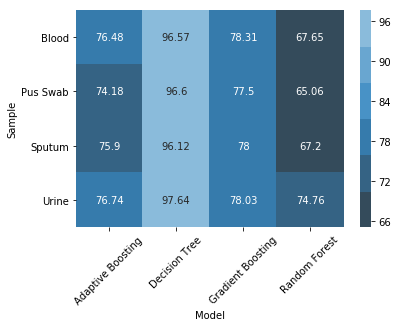

In [89]:
accuracy = table_4[['Sample', 'Model', 'Accuracy']]
accuracy.Accuracy = accuracy.Accuracy.apply(lambda x: float(x.split(chr(177))[0]))
import seaborn as sns
import matplotlib.pyplot as plt
result = accuracy.pivot(index='Sample', columns='Model', values='Accuracy')
sns.heatmap(result, annot=True, fmt="g", cmap=sns.color_palette("Blues_d"))
plt.yticks(rotation=360)
plt.xticks(rotation=45)
plt.show()

/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


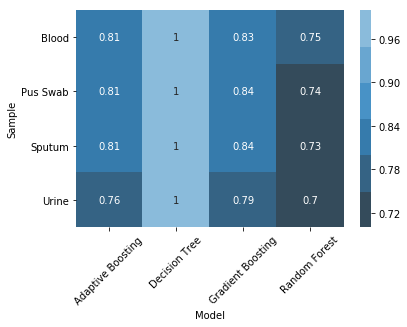

In [90]:
auc = table_4[['Sample', 'Model', 'AUC_ROC']]
auc.AUC_ROC = auc.AUC_ROC.apply(lambda x: float(x.split(chr(177))[0]))
import seaborn as sns
import matplotlib.pyplot as plt
result = auc.pivot(index='Sample', columns='Model', values='AUC_ROC')
sns.heatmap(result, annot=True, fmt="g", cmap=sns.color_palette("Blues_d"))
plt.yticks(rotation=360)
plt.xticks(rotation=45)
plt.show()

/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


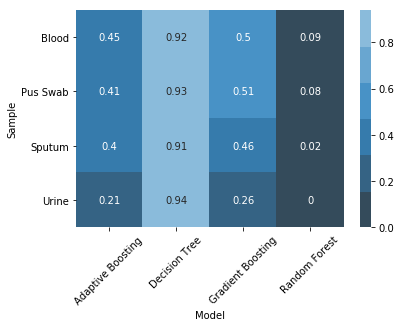

In [94]:
kappa = table_4[['Sample', 'Model', 'Kappa']]
kappa.Kappa = kappa.Kappa.apply(lambda x: float(x.split(chr(177))[0]))
import seaborn as sns
import matplotlib.pyplot as plt
result = kappa.pivot(index='Sample', columns='Model', values='Kappa')
sns.heatmap(result, annot=True, fmt="g", cmap=sns.color_palette("Blues_d"))
plt.yticks(rotation=360)
plt.xticks(rotation=45)
plt.show()

/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


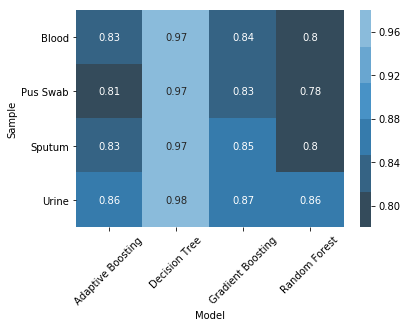

In [95]:
f1 = table_4[['Sample', 'Model', 'F1_score']]
f1.F1_score = f1.F1_score.apply(lambda x: float(x.split(chr(177))[0]))
import seaborn as sns
import matplotlib.pyplot as plt
result = f1.pivot(index='Sample', columns='Model', values='F1_score')
sns.heatmap(result, annot=True, fmt="g", cmap=sns.color_palette("Blues_d"))
plt.yticks(rotation=360)
plt.xticks(rotation=45)
plt.show()

/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


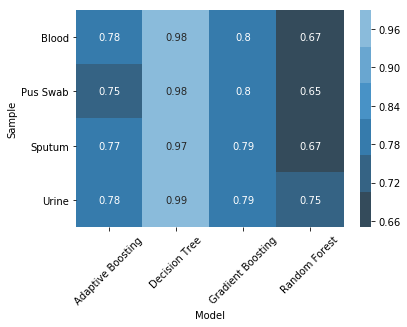

In [96]:
p = table_4[['Sample', 'Model', 'Precision']]
p.Precision = p.Precision.apply(lambda x: float(x.split(chr(177))[0]))
import seaborn as sns
import matplotlib.pyplot as plt
result = p.pivot(index='Sample', columns='Model', values='Precision')
sns.heatmap(result, annot=True, fmt="g", cmap=sns.color_palette("Blues_d"))
plt.yticks(rotation=360)
plt.xticks(rotation=45)
plt.show()

/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


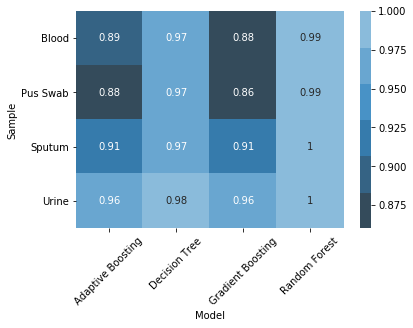

In [97]:
r = table_4[['Sample', 'Model', 'Recall']]
r.Recall = r.Recall.apply(lambda x: float(x.split(chr(177))[0]))
import seaborn as sns
import matplotlib.pyplot as plt
result = r.pivot(index='Sample', columns='Model', values='Recall')
sns.heatmap(result, annot=True, fmt="g", cmap=sns.color_palette("Blues_d"))
plt.yticks(rotation=360)
plt.xticks(rotation=45)
plt.show()

##### Ensemble Method

In [100]:
from mlens.visualization import corrmat
ensembleModels = {'Random Forest': RandomForestClassifier(n_estimators=200, max_depth=10, random_state=0), 
          'Decision Tree':DecisionTreeClassifier(), 'Adaptive Boosting': AdaBoostClassifier(), 
          'Gradient Boosting': GradientBoostingClassifier(), 'Naive Bayes': GaussianNB(),
          'Logistic Regression': LogisticRegression(), 'k Nearest Neighbors': KNeighborsClassifier(n_neighbors = 13, metric= 'hamming')}
metaLearner = GradientBoostingClassifier(n_estimators=1000, loss='exponential', max_features=5,
                                         max_depth=4, subsample=0.5, learning_rate=0.005)

[MLENS] backend: threading


##### Correlation Matrix for Blood Sample

In [102]:
train, test = sampleData[2][0][99], sampleData[2][1][99]
features = ['age', 'sex', 'num_prev_adm', 'interval', 'comorbidity0',
       'comorbidity1', 'comorbidity2', 'comorbidity3', 'comorbidity4',
       'comorbidity5', 'comorbidity6', 'comorbidity7', 'comorbidity8',
       'comorbidity9', 'comorbidity10', 'comorbidity11', 'comorbidity12',
       'comorbidity13', 'comorbidity14', 'comorbidity15', 'comorbidity16',
       'comorbidity17', 'comorbidity18', 'device0', 'device1', 'device2',
       'device3', 'device4', 'device5', 'device6', 'device7', 'device8',
       'device9', 'antibiotic_name']
Xtrain = train[features]
Xtest = test[features]
ytrain = train['susceptibility']
ytest = test['susceptibility']
probabilityMatrix = np.zeros((test.shape[0], len(ensembleModels)))
for i, (name, model) in enumerate(ensembleModels.items()):
    model.fit(Xtrain, ytrain)
    probabilityMatrix[:,i] = model.predict_proba(Xtest)[:, 1]
    print(name)

Random Forest
Decision Tree
Adaptive Boosting
Gradient Boosting
Naive Bayes
Logistic Regression
k Nearest Neighbors


AttributeError: 'numpy.ndarray' object has no attribute 'apply'

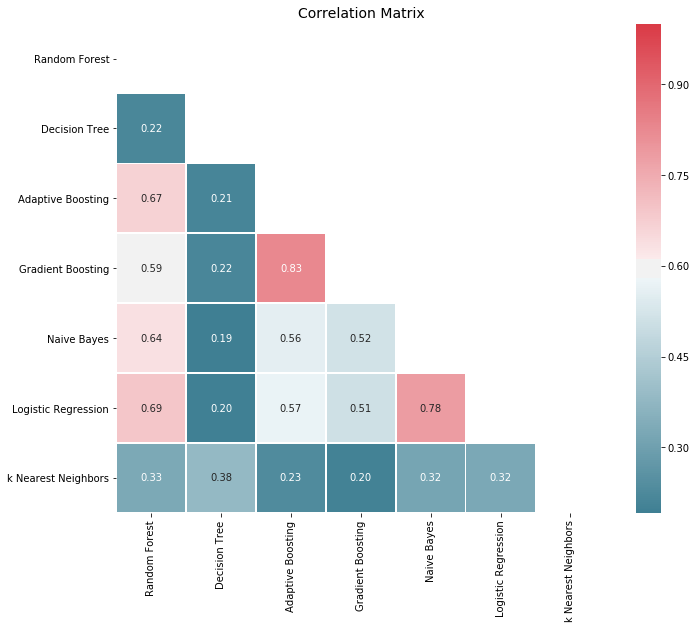

In [105]:
P=pd.DataFrame(probabilityMatrix)
columns=[]
for i, (name, model) in enumerate(ensembleModels.items()):
    columns.append(name)
P.columns=columns
corrmat(P.apply(lambda pred: 1*(pred >= 0.5) - ytest.values).corr(), inflate=False)
plt.show()

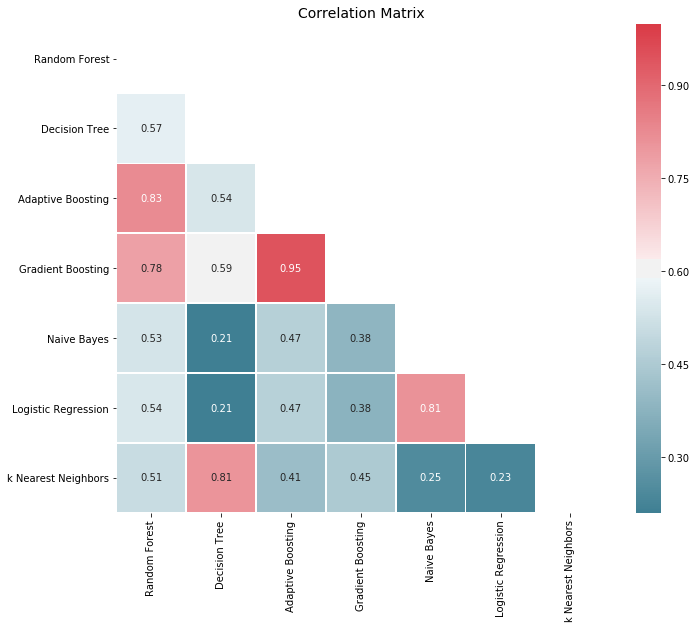

In [106]:
corrmat(P.corr(), inflate=False)
plt.show()

In [ ]:
#______________________________________________________/\______________________________________________________#
#sample wise performance for not one hot encoded (previous format) data

In [18]:
def mimicRandomSplitPerformance(sample, model):
    sampleData = mimic[mimic.sample_type==sample]
    uniqueData = sampleData.drop_duplicates().reset_index(drop=True)
    features = ['age', 'sex', 'num_prev_adm', 'interval', 'device', 
                'comorbidity', 'antibiotic_name']
    filteredData = uniqueData[features + ['susceptibility']]
    labelEncoder = preprocessing.LabelEncoder()
    encodedData = filteredData.apply(labelEncoder.fit_transform)
    train, test = train_test_split(encodedData, test_size=0.3)
    Xtrain = train[features]
    Xtest = test[features]
    ytrain = train['susceptibility']
    ytest = test['susceptibility']
    
    model.fit(Xtrain, ytrain)
    probabilities = model.predict_proba(Xtest)[:, 1]
    predictions = np.array([1 if x>0.5 else 0 for x in probabilities])
    tn, fp, fn, tp = confusion_matrix(ytest, predictions).ravel()
    specificity = tn / (tn+fp)
    recall = recall_score(ytest, predictions)
    Youden = specificity + recall - 1
    measures = [accuracy_score(ytest, predictions), f1_score(ytest, predictions), precision_score(ytest, predictions), 
                specificity, recall, Youden, cohen_kappa_score(ytest, predictions), roc_auc_score(ytest, probabilities)]
    print(measures)
    return measures
    

In [25]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [11]:
models = {'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0), 
          'Decision Tree':DecisionTreeClassifier(), 'Adaptive Boosting': AdaBoostClassifier(), 
          'Gradient Boosting': GradientBoostingClassifier()}

In [12]:
temp = mimic.drop_duplicates(subset=['patient_id', 'admission_id', 'sample_type']).sample_type.value_counts()
samples = temp[temp>1000].index.tolist()
samples

['Urine', 'Sputum', 'Blood', 'Pus Swab']

In [19]:
measures = []
for sample in samples:
    for i, (name, model) in enumerate(models.items()):
        performance = mimicRandomSplitPerformance(sample, model)
        measures.append([sample, name] + performance)

[0.7489498191760974, 0.8559378289760421, 0.7488765561017964, 0.012435113623255277, 0.9987169055517306, 0.011152019174985872, 0.016523481514860827, 0.6841559261820399]
[0.8358738263973685, 0.8903101864867398, 0.8887069993685836, 0.670581449007845, 0.8919191682117962, 0.5625006172196412, 0.5644891626461306, 0.8239007592120191]
[0.7633280946009897, 0.859121181032534, 0.7731907781484936, 0.16450296308252818, 0.9665399001518068, 0.131042863234335, 0.1732031179880864, 0.7573651893234759]
[0.779716173661056, 0.8668653469961369, 0.7912704910107072, 0.24851466765688823, 0.9584299579146268, 0.20694462557151505, 0.2614042431710024, 0.779293504084158]
[0.6882082270028693, 0.8079834208029836, 0.686286579841058, 0.09701373681067091, 0.9821435641604308, 0.07915730097110174, 0.1012224330688235, 0.7418258097914104]
[0.8610651998571976, 0.8946537333634108, 0.907034894949228, 0.8176416636758783, 0.8826060294350372, 0.7002476931109154, 0.6907975430539577, 0.8691430341138942]
[0.7624919012548097, 0.8377290

In [21]:
table = pd.DataFrame(measures, columns=['Sample', 'Model', 'Accuracy', 'F1_score', 'Precision', 'Specificity', 'Recall', 'YoudensJ', 'Kappa', 'AUC_ROC'])

In [22]:
table

,Sample,Model,Accuracy,F1_score,Precision,Specificity,Recall,YoudensJ,Kappa,AUC_ROC
0,Urine,Random Forest,0.748950,0.855938,0.748877,0.012435,0.998717,0.011152,0.016523,0.684156
1,Urine,Decision Tree,0.835874,0.890310,0.888707,0.670581,0.891919,0.562501,0.564489,0.823901
2,Urine,Adaptive Boosting,0.763328,0.859121,0.773191,0.164503,0.966540,0.131043,0.173203,0.757365
3,Urine,Gradient Boosting,0.779716,0.866865,0.791270,0.248515,0.958430,0.206945,0.261404,0.779294
4,Sputum,Random Forest,0.688208,0.807983,0.686287,0.097014,0.982144,0.079157,0.101222,0.741826
5,Sputum,Decision Tree,0.861065,0.894654,0.907035,0.817642,0.882606,0.700248,0.690798,0.869143
6,Sputum,Adaptive Boosting,0.762492,0.837729,0.769854,0.449119,0.918730,0.367849,0.407474,0.811876
7,Sputum,Gradient Boosting,0.778822,0.845528,0.793444,0.524023,0.904932,0.428954,0.462082,0.831475
8,Blood,Random Forest,0.697438,0.808755,0.689806,0.167021,0.977275,0.144296,0.177395,0.743277
9,Blood,Decision Tree,0.849319,0.883438,0.895101,0.806159,0.872075,0.678234,0.670502,0.869103


In [24]:
knnPerformance = []
kNN = KNeighborsClassifier(n_neighbors=13, metric='hamming')
for sample in samples:
    performance = mimicRandomSplitPerformance(sample, kNN)
    knnPerformance.append([sample, 'kNN'] + performance)

[0.8109674516975246, 0.8828146221853598, 0.8206051873198847, 0.3885854598861759, 0.9552298467688208, 0.3438153066549967, 0.40839910767678544, 0.8062923414254031]
[0.8250737151092835, 0.8769835181439896, 0.8253883516387345, 0.6044252349419089, 0.9354592342789129, 0.5398844692208218, 0.5784089380525479, 0.8692316276487991]
[0.8266266369894922, 0.8744442695096076, 0.8291815958596371, 0.6418435487717624, 0.9249337837623511, 0.5667773325341137, 0.5971043350981124, 0.8719506356407417]
[0.8471111111111111, 0.8830282092434918, 0.8468823375945734, 0.7212935701396144, 0.922397135712662, 0.6436907058522765, 0.6635470213259651, 0.912030050297222]


In [28]:
table1 = pd.DataFrame(knnPerformance, columns=['Sample', 'Model', 'Accuracy', 'F1_score', 'Precision', 'Specificity', 'Recall', 'YoudensJ', 'Kappa', 'AUC_ROC'])

In [30]:
table1

,Sample,Model,Accuracy,F1_score,Precision,Specificity,Recall,YoudensJ,Kappa,AUC_ROC
0,Urine,kNN,0.810967,0.882815,0.820605,0.388585,0.955230,0.343815,0.408399,0.806292
1,Sputum,kNN,0.825074,0.876984,0.825388,0.604425,0.935459,0.539884,0.578409,0.869232
2,Blood,kNN,0.826627,0.874444,0.829182,0.641844,0.924934,0.566777,0.597104,0.871951
3,Pus Swab,kNN,0.847111,0.883028,0.846882,0.721294,0.922397,0.643691,0.663547,0.912030


In [38]:
table2=table
for i in range(4):
    cut = 4*(i+1)+i
    line = pd.DataFrame(table1.iloc[i].to_dict(), index=[cut])
    print(line)
    table2 = pd.concat([table2.iloc[:cut], line, table2.iloc[cut:]]).reset_index(drop=True)
table2

  Sample Model  Accuracy  F1_score  Precision  Specificity   Recall  YoudensJ  \
4  Urine   kNN  0.810967  0.882815   0.820605     0.388585  0.95523  0.343815   

      Kappa   AUC_ROC  
4  0.408399  0.806292  
   Sample Model  Accuracy  F1_score  Precision  Specificity    Recall  \
9  Sputum   kNN  0.825074  0.876984   0.825388     0.604425  0.935459   

   YoudensJ     Kappa   AUC_ROC  
9  0.539884  0.578409  0.869232  
   Sample Model  Accuracy  F1_score  Precision  Specificity    Recall  \
14  Blood   kNN  0.826627  0.874444   0.829182     0.641844  0.924934   

    YoudensJ     Kappa   AUC_ROC  
14  0.566777  0.597104  0.871951  
      Sample Model  Accuracy  F1_score  Precision  Specificity    Recall  \
19  Pus Swab   kNN  0.847111  0.883028   0.846882     0.721294  0.922397   

    YoudensJ     Kappa  AUC_ROC  
19  0.643691  0.663547  0.91203  


,Sample,Model,Accuracy,F1_score,Precision,Specificity,Recall,YoudensJ,Kappa,AUC_ROC
0,Urine,Random Forest,0.748950,0.855938,0.748877,0.012435,0.998717,0.011152,0.016523,0.684156
1,Urine,Decision Tree,0.835874,0.890310,0.888707,0.670581,0.891919,0.562501,0.564489,0.823901
2,Urine,Adaptive Boosting,0.763328,0.859121,0.773191,0.164503,0.966540,0.131043,0.173203,0.757365
3,Urine,Gradient Boosting,0.779716,0.866865,0.791270,0.248515,0.958430,0.206945,0.261404,0.779294
4,Urine,kNN,0.810967,0.882815,0.820605,0.388585,0.955230,0.343815,0.408399,0.806292
5,Sputum,Random Forest,0.688208,0.807983,0.686287,0.097014,0.982144,0.079157,0.101222,0.741826
6,Sputum,Decision Tree,0.861065,0.894654,0.907035,0.817642,0.882606,0.700248,0.690798,0.869143
7,Sputum,Adaptive Boosting,0.762492,0.837729,0.769854,0.449119,0.918730,0.367849,0.407474,0.811876
8,Sputum,Gradient Boosting,0.778822,0.845528,0.793444,0.524023,0.904932,0.428954,0.462082,0.831475
9,Sputum,kNN,0.825074,0.876984,0.825388,0.604425,0.935459,0.539884,0.578409,0.869232


In [26]:
ensembleModels = {'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0), 
          'Decision Tree':DecisionTreeClassifier(), 'Adaptive Boosting': AdaBoostClassifier(), 
          'Gradient Boosting': GradientBoostingClassifier(), 'Naive Bayes': GaussianNB()}

In [40]:
metaLearner = GradientBoostingClassifier(n_estimators=1000, loss='exponential', max_features=4,
                                         max_depth=3, subsample=0.5, learning_rate=0.005)

In [45]:
def mimicRandomSplitPerformanceEnsemble(sample, models, meta):
    sampleData = mimic[mimic.sample_type==sample]
    uniqueData = sampleData.drop_duplicates().reset_index(drop=True)
    features = ['age', 'sex', 'num_prev_adm', 'interval', 'device', 
                'comorbidity', 'antibiotic_name']
    filteredData = uniqueData[features + ['susceptibility']]
    labelEncoder = preprocessing.LabelEncoder()
    encodedData = filteredData.apply(labelEncoder.fit_transform)
    train, test = train_test_split(encodedData, test_size=0.3)
    Xtrain = train[features]
    Xtest = test[features]
    ytrain = train['susceptibility']
    ytest = test['susceptibility']
    
    probabilityMatrix = np.zeros((test.shape[0], len(models)))
    for i, (name, model) in enumerate(models.items()):
        model.fit(Xtrain, ytrain)
        probabilityMatrix[:,i] = model.predict_proba(Xtest)[:, 1]
     
    meta.fit(probabilityMatrix, ytest)
    probabilities = meta.predict_proba(probabilityMatrix)[:, 1]
    predictions = np.array([1 if x>0.5 else 0 for x in probabilities])
    tn, fp, fn, tp = confusion_matrix(ytest, predictions).ravel()
    specificity = tn / (tn+fp)
    recall = recall_score(ytest, predictions)
    Youden = specificity + recall - 1
    measures = [accuracy_score(ytest, predictions), f1_score(ytest, predictions), precision_score(ytest, predictions), 
                specificity, recall, Youden, cohen_kappa_score(ytest, predictions), roc_auc_score(ytest, probabilities)]
    print(measures)
    return measures

In [46]:
ensemblePerformance = []
for sample in samples:
    performance = mimicRandomSplitPerformanceEnsemble(sample, ensembleModels, metaLearner)
    ensemblePerformance.append([sample, 'Ensemble'] + performance)

[0.857999193741565, 0.9095664921621813, 0.8681212534447001, 0.5701453838318363, 0.9551674285937561, 0.5253128124255926, 0.5826359734806347, 0.8781676080177885]
[0.8702547964405188, 0.9035555446347396, 0.8955151184538653, 0.787304923754189, 0.9117416616251277, 0.6990465853793166, 0.7054340675536853, 0.9173365781273946]
[0.862818986489984, 0.8970580238185872, 0.8800548738663212, 0.7649430952594318, 0.9147311385024874, 0.6796742337619193, 0.691740759568525, 0.9182337421445375]
[0.8916977777777778, 0.9141439765488472, 0.9100143101658296, 0.8467969235178904, 0.9183112948438429, 0.7651082183617333, 0.7675124466274761, 0.9396044819502349]


In [47]:
table3 = pd.DataFrame(ensemblePerformance, columns=['Sample', 'Model', 'Accuracy', 'F1_score', 'Precision', 'Specificity', 'Recall', 'YoudensJ', 'Kappa', 'AUC_ROC'])
table3

,Sample,Model,Accuracy,F1_score,Precision,Specificity,Recall,YoudensJ,Kappa,AUC_ROC
0,Urine,Ensemble,0.857999,0.909566,0.868121,0.570145,0.955167,0.525313,0.582636,0.878168
1,Sputum,Ensemble,0.870255,0.903556,0.895515,0.787305,0.911742,0.699047,0.705434,0.917337
2,Blood,Ensemble,0.862819,0.897058,0.880055,0.764943,0.914731,0.679674,0.691741,0.918234
3,Pus Swab,Ensemble,0.891698,0.914144,0.910014,0.846797,0.918311,0.765108,0.767512,0.939604


In [49]:
table4=table2
for i in range(4):
    cut = 5*(i+1)+i
    line = pd.DataFrame(table3.iloc[i].to_dict(), index=[cut])
    print(line)
    table4 = pd.concat([table4.iloc[:cut], line, table4.iloc[cut:]]).reset_index(drop=True)
table4

  Sample     Model  Accuracy  F1_score  Precision  Specificity    Recall  \
5  Urine  Ensemble  0.857999  0.909566   0.868121     0.570145  0.955167   

   YoudensJ     Kappa   AUC_ROC  
5  0.525313  0.582636  0.878168  
    Sample     Model  Accuracy  F1_score  Precision  Specificity    Recall  \
11  Sputum  Ensemble  0.870255  0.903556   0.895515     0.787305  0.911742   

    YoudensJ     Kappa   AUC_ROC  
11  0.699047  0.705434  0.917337  
   Sample     Model  Accuracy  F1_score  Precision  Specificity    Recall  \
17  Blood  Ensemble  0.862819  0.897058   0.880055     0.764943  0.914731   

    YoudensJ     Kappa   AUC_ROC  
17  0.679674  0.691741  0.918234  
      Sample     Model  Accuracy  F1_score  Precision  Specificity    Recall  \
23  Pus Swab  Ensemble  0.891698  0.914144   0.910014     0.846797  0.918311   

    YoudensJ     Kappa   AUC_ROC  
23  0.765108  0.767512  0.939604  


,Sample,Model,Accuracy,F1_score,Precision,Specificity,Recall,YoudensJ,Kappa,AUC_ROC
0,Urine,Random Forest,0.748950,0.855938,0.748877,0.012435,0.998717,0.011152,0.016523,0.684156
1,Urine,Decision Tree,0.835874,0.890310,0.888707,0.670581,0.891919,0.562501,0.564489,0.823901
2,Urine,Adaptive Boosting,0.763328,0.859121,0.773191,0.164503,0.966540,0.131043,0.173203,0.757365
3,Urine,Gradient Boosting,0.779716,0.866865,0.791270,0.248515,0.958430,0.206945,0.261404,0.779294
4,Urine,kNN,0.810967,0.882815,0.820605,0.388585,0.955230,0.343815,0.408399,0.806292
5,Urine,Ensemble,0.857999,0.909566,0.868121,0.570145,0.955167,0.525313,0.582636,0.878168
6,Sputum,Random Forest,0.688208,0.807983,0.686287,0.097014,0.982144,0.079157,0.101222,0.741826
7,Sputum,Decision Tree,0.861065,0.894654,0.907035,0.817642,0.882606,0.700248,0.690798,0.869143
8,Sputum,Adaptive Boosting,0.762492,0.837729,0.769854,0.449119,0.918730,0.367849,0.407474,0.811876
9,Sputum,Gradient Boosting,0.778822,0.845528,0.793444,0.524023,0.904932,0.428954,0.462082,0.831475
